# This reads in a file with daily AO data

In [35]:
%config Completer.use_jedi = False
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv('/home/robbie/Dropbox/beaufort_sea/norm.daily.ao.index.b500101.current.ascii',
                 delim_whitespace=True,header=None,names=['Year','Month','Day','AO'])
df['date'] = [datetime.date(year=int(year),month=int(month),day=int(day)) for (year,month,day) in zip(df['Year'],df['Month'],df['Day'])]
df.set_index('date',inplace=True)
df

,Year,Month,Day,AO
date,,,,
1950-01-01,1950,1,1,-2.511
1950-01-02,1950,1,2,-1.505
1950-01-03,1950,1,3,-1.173
1950-01-04,1950,1,4,-1.251
1950-01-05,1950,1,5,-0.126
...,...,...,...,...
2021-01-27,2021,1,27,-3.202
2021-01-28,2021,1,28,-2.593
2021-01-29,2021,1,29,-2.726


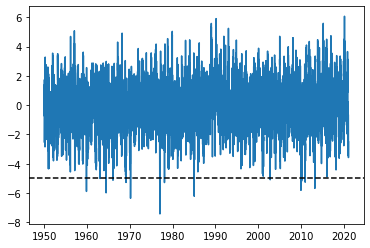

In [45]:
plt.plot(df.index,df['AO'])
plt.axhline(-5,color='k', ls='--')

In [26]:
print(f"Min value of {df['AO'].min()} on {df['AO'].idxmin()}")

Min value of -7.433 on 1977-01-15


# Get winter AO values only

In [32]:
winter_months = [10,11,12,1,2,3,4]

df['Month'] = [x.month for x in df.index]

df_winter = df[df['Month'].isin(winter_months)]

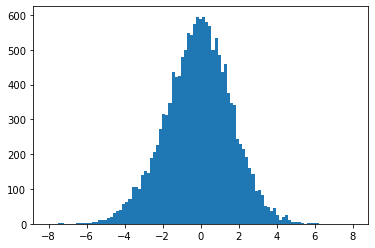

In [36]:
plt.hist(df_winter['AO'],bins=np.linspace(-8,8,100))
plt.show()

# Timeseries plot of AO values below 5

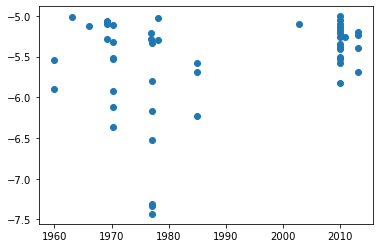

In [42]:
very_low_vals = df_winter[df_winter['AO'] < -5]

plt.scatter(very_low_vals.index, very_low_vals['AO'])

# Look at very low AO vals after 2000

In [43]:

low_modern_vals = very_low_vals[very_low_vals.index > datetime.date(year=2000,month=1,day=1)]
low_modern_vals

,Year,Month,Day,AO
date,,,,
2002-10-18,2002,10,18,-5.098
2009-12-20,2009,12,20,-5.341
2009-12-21,2009,12,21,-5.821
2009-12-22,2009,12,22,-5.503
2009-12-23,2009,12,23,-5.577
2009-12-24,2009,12,24,-5.256
2009-12-25,2009,12,25,-5.052
2010-01-02,2010,1,2,-5.384
2010-01-03,2010,1,3,-5.533


### So the vast majority of AO values below -5 occured in the winter of 2009/10, with a few occurring in March 2013

In [46]:
low_modern_vals.shape

(20, 4)